In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

C:\Users\91759\Desktop\Pro\MIRNet


Cloning into 'MIRNet'...


In [3]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


In [4]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)
inferer.model.summary()

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: C:\Users\91759\Desktop\Pro\MIRNet\low_light_weights_best.h5
100%|████████████████████████████████████████████████████████████████████████████████| 148M/148M [08:53<00:00, 277kB/s]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

                                                                 conv2d_135[0][0]                 
__________________________________________________________________________________________________
add_35 (Add)                    (None, None, None, 6 0           conv2d_144[0][0]                 
                                                                 conv2d_143[0][0]                 
__________________________________________________________________________________________________
tf.reshape_18 (TFOpLambda)      (None, 1, 1, 256)    0           global_average_pooling2d_18[0][0]
__________________________________________________________________________________________________
tf.math.reduce_max_11 (TFOpLamb (None, None, None)   0           conv2d_194[0][0]                 
__________________________________________________________________________________________________
tf.math.reduce_mean_11 (TFOpLam (None, None, None)   0           conv2d_194[0][0]                 
__________

conv2d_322 (Conv2D)             (None, None, None, 1 8320        max_pooling2d_37[0][0]           
__________________________________________________________________________________________________
conv2d_321 (Conv2D)             (None, None, None, 1 8320        max_pooling2d_36[0][0]           
__________________________________________________________________________________________________
re_lu_49 (ReLU)                 (None, 1, 1, 8)      0           conv2d_329[0][0]                 
__________________________________________________________________________________________________
concatenate_36 (Concatenate)    (None, None, None, 2 0           tf.expand_dims_36[0][0]          
                                                                 tf.expand_dims_37[0][0]          
__________________________________________________________________________________________________
add_85 (Add)                    (None, None, None, 1 0           conv2d_322[0][0]                 
          

tf.expand_dims_58 (TFOpLambda)  (None, None, None, 1 0           tf.math.reduce_max_29[0][0]      
__________________________________________________________________________________________________
tf.expand_dims_59 (TFOpLambda)  (None, None, None, 1 0           tf.math.reduce_mean_29[0][0]     
__________________________________________________________________________________________________
global_average_pooling2d_43 (Gl (None, 64)           0           add_122[0][0]                    
__________________________________________________________________________________________________
re_lu_78 (ReLU)                 (None, 1, 1, 32)     0           conv2d_514[0][0]                 
__________________________________________________________________________________________________
concatenate_58 (Concatenate)    (None, None, None, 2 0           tf.expand_dims_58[0][0]          
                                                                 tf.expand_dims_59[0][0]          
__________

In [5]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet\assets


In [11]:
img=r"C:\Users\91759\Desktop\Pro\dataset\fig1.jpg"
original_image, output_image = inferer.infer(img)


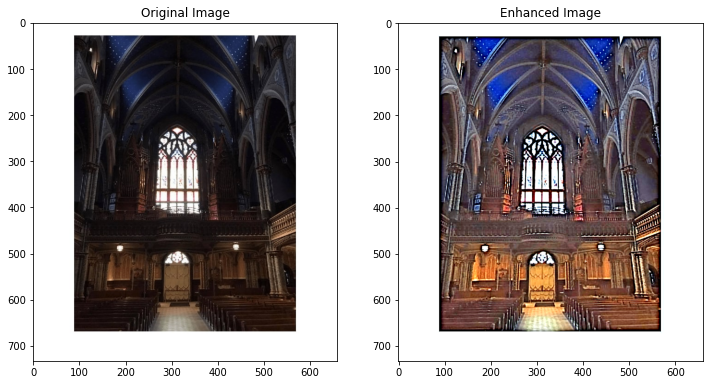

In [12]:
plot_result(original_image, output_image)

In [ ]:
img=r"C:\Users\91759\Desktop\Pro\dataset\fig3.jpg"
original_image, output_image = inferer.infer(img)


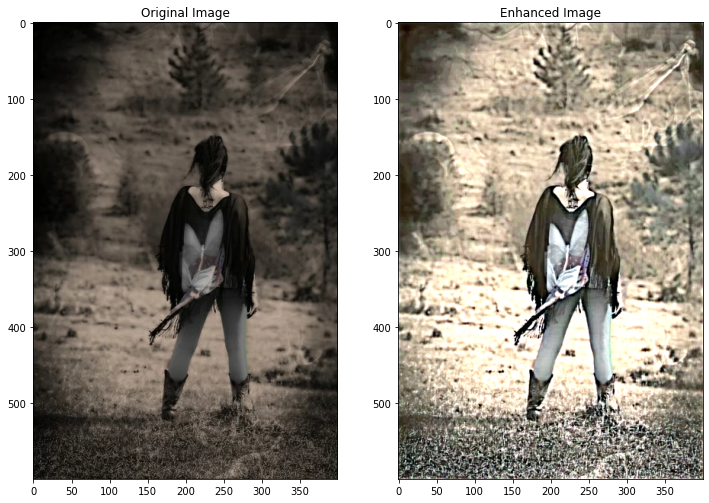

In [16]:
plot_result(original_image, output_image)